In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd   

In [0]:
import os
os.getcwd()
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

In [68]:
type(df_tweets['date'].iloc[0])

str

In [72]:
import pandas as pd
from datetime import datetime

df_tweets = pd.read_csv('all_tweets_data.csv')
df_tweets = df_tweets[df_tweets['date'].notnull()]
df_tweets['date'] = df_tweets['date'].map(lambda x: datetime.strptime(str(x), '%Y-%m-%d'))

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df_after_news = df_tweets[df_tweets['date']>'2019-10-27']

In [76]:
df_after_news.isnull().sum()

Unnamed: 0              0
has_media               0
hashtags                0
img_urls                0
is_replied              0
is_reply_to             0
likes                   0
links                   0
parent_tweet_id     57747
replies                 0
reply_to_users          0
retweets                0
screen_name             0
text                   96
text_html               0
timestamp               0
timestamp_epochs        0
tweet_id                0
tweet_url               0
user_id                 0
username                4
video_url           71893
date                    0
dtype: int64

In [78]:
df_after_news.head()

,Unnamed: 0,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,date
5365,5365,False,[],[],False,True,0.0,[],1.193668e+18,0,"[{'screen_name': 'SimonJo10756658', 'user_id':...",0.0,FitbitSupport,"1/2 Hello there, thanks for reaching out and w...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-11-10 23:59:56,2019-11-10 23:59:56,1.193680e+18,/FitbitSupport/status/1193679716156243969,476258341.0,Fitbit Support,NaN,2019-11-10
5366,5366,False,[],[],False,False,1.0,[],NaN,0,[],0.0,l_b__,昨日横浜線でがっつり寝落ちていた時間がfitbitによって睡眠時間にカウントされていない。,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-11-10 23:59:02,2019-11-10 23:59:02,1.193679e+18,/l_b__/status/1193679487986061315,45313531.0,l.b.,NaN,2019-11-10
5367,5367,False,[],[],False,True,2.0,[],1.193650e+18,0,"[{'screen_name': 'smoxr1', 'user_id': '4831139...",0.0,I_5iial,fitbit charge 2,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-11-10 23:57:36,2019-11-10 23:57:36,1.193679e+18,/I_5iial/status/1193679130832842754,714773499.0,خيال🕊,NaN,2019-11-10
5368,5368,False,[],[],True,True,0.0,[],1.193592e+18,1,"[{'screen_name': 'NodeConfEU', 'user_id': '526...",0.0,BillStewart415,"It's cool, but one of the purposes of a badge ...","<p class=""TweetTextSize js-tweet-text tweet-te...",2019-11-10 23:57:25,2019-11-10 23:57:25,1.193679e+18,/BillStewart415/status/1193679083697139713,330433609.0,Bill Stewart,NaN,2019-11-10
5369,5369,True,"['MobTechCast', 'Xperia5', 'GoFlip3', 'MiCC9Pro']",['https://pbs.twimg.com/media/EJDMmvJUEAAiC5n....,False,False,5.0,['https://worldpodcasts.com/sony-xperia-5-alca...,NaN,0,[],0.0,tnkgrl,The lovely @techiesupreme was my guest (again)...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2019-11-10 23:57:12,2019-11-10 23:57:12,1.193679e+18,/tnkgrl/status/1193679029158592513,2806761.0,Myriam Joire,NaN,2019-11-10


In [0]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [81]:
df_after_news.columns.values
df_after_news.dtypes
df_after_news['likes'].fillna(0,inplace=True)
df_after_news['retweets'].fillna(0,inplace=True)
df_after_news['likes_pre'] = df_after_news['likes'].map(lambda x: (x-df_after_news.likes.min())/df_after_news.likes.max() )
df_after_news['retweets_pre'] = df_after_news['retweets'].map(lambda x: (x-df_after_news.retweets.min())/df_after_news.retweets.max() )

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

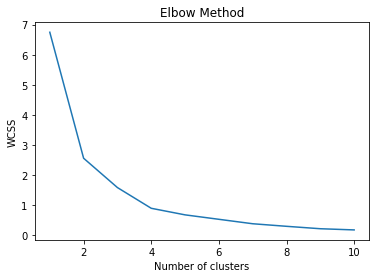

In [82]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_after_news[['likes_pre','retweets_pre']])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [123]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
df_after_news['cluster'] = kmeans.fit_predict(df_after_news[['likes_pre','retweets_pre']])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [124]:
df_after_news['cluster'].unique()

array([0, 3, 1, 2])

In [125]:
df_after_news.groupby('cluster')[['likes','retweets']].mean()

,likes,retweets
cluster,,
0,1.947772,0.569401
1,9514.000000,2312.000000
2,3347.500000,5007.000000
3,1777.300000,507.133333


# Sentiment Analysis by Cluster

In [126]:
pip install vaderSentiment

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [0]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [129]:
## Getting the compounded sentiment score

def getsentimentscore(s):
  try:
    score = analyser.polarity_scores(s)
    return score['compound']   
  except:
    return 0

df_after_news['sentiment_compounded'] = df_after_news['text'].map(getsentimentscore)
df_after_news.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


(71893, 27)

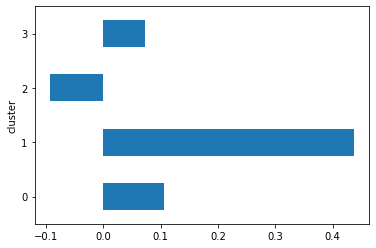

In [131]:
df_after_news.groupby('cluster')['sentiment_compounded'].agg('mean').plot(kind='barh')